In [24]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt

In [25]:
prcsv = pd.read_csv("./../test_data/StayingFit.txt",sep='|',names=['DATE_RECORDED','IMPACTED_DATE',\
                'FRUIT_PORTIONS','VEG_PORTIONS','JUNK_FOOD_PORTIONS','MEAL_SIZE','STOPPED_BEFORE_FULL',\
                'PHYSICAL_ACTIVITY_TYPE','PHYSICAL_ACTIVITY_TIME','RESTED','WEIGHT','GOT_UP_TIME','BED_TIME',\
                'TOTAL_TIME_SPENT_IN_BED','TIME_TOOK_TO_FALL_ASLEEP','AWAKE_IN_BED_AFTER_INITIAL_SLEEP',\
                'TOTAL_TIME_AWAKE_IN_BED','ACTUAL_SLEEP_TIME','MINDFUL_EATING','MORNING_RITUALS',\
                'EVENING_RITUALS','LW_STAIRS','REVISION','MEMORY_TECHNIQUES','BEYOND_5PM'])

###### Last 7 days data

In [26]:
prcsv.tail(7)

,DATE_RECORDED,IMPACTED_DATE,FRUIT_PORTIONS,VEG_PORTIONS,JUNK_FOOD_PORTIONS,MEAL_SIZE,STOPPED_BEFORE_FULL,PHYSICAL_ACTIVITY_TYPE,PHYSICAL_ACTIVITY_TIME,RESTED,...,AWAKE_IN_BED_AFTER_INITIAL_SLEEP,TOTAL_TIME_AWAKE_IN_BED,ACTUAL_SLEEP_TIME,MINDFUL_EATING,MORNING_RITUALS,EVENING_RITUALS,LW_STAIRS,REVISION,MEMORY_TECHNIQUES,BEYOND_5PM
128,20190506 110202,20190505,1,1,1,large,no,home excercises + walking,30,no,...,0.0,0:10:00,6:25:00,0.0,Yes,No,No,Yes,No,No
129,20190507 062708,20190506,0,1,0,medium,yes,home excercises,10,no,...,0.0,0:20:00,6:10:00,0.0,Yes,No,No,Yes,No,No
130,20190508 062454,20190507,1,2,0,medium,yes,walking + home excercises,30,no,...,5.0,0:15:00,7:00:00,0.0,Yes,Yes,Yes,Yes,Yes,No
131,20190509 062100,20190508,1,2,0,medium,yes,walking + home excercises,30,no,...,0.0,0:10:00,6:25:00,0.0,Yes,No,Yes,Yes,No,No
132,20190510 062941,20190509,1,2,0,medium,yes,walking,20,no,...,0.0,0:10:00,6:45:00,0.0,Yes,No,Yes,Yes,No,Yes
133,20190511 064440,20190510,1,2,0,medium,yes,walking + home excercises,30,no,...,0.0,0:10:00,6:50:00,0.0,Yes,No,Yes,No,No,No
134,20190512 190320,20190511,1,2,2,large,no,home excercises + walking,30,no,...,10.0,0:20:00,6:05:00,0.0,Yes,No,No,No,No,No


In [27]:
pd_column_index = pd.to_datetime(prcsv['IMPACTED_DATE'],format="%Y%m%d",box=True)
prcsv.index = pd_column_index
prcsv = prcsv.drop('IMPACTED_DATE',axis=1)

In [28]:
prcsv['ACTUAL_SLEEP_TIME'][-7:]

IMPACTED_DATE
2019-05-05    6:25:00
2019-05-06    6:10:00
2019-05-07    7:00:00
2019-05-08    6:25:00
2019-05-09    6:45:00
2019-05-10    6:50:00
2019-05-11    6:05:00
Name: ACTUAL_SLEEP_TIME, dtype: object

###### Total Hours slept


In [29]:
time_slept = (pd.to_timedelta(prcsv['ACTUAL_SLEEP_TIME'][-7:])).sum()/7
"%d hours, %d minutes" % (time_slept.components.hours,time_slept.components.minutes)

'6 hours, 31 minutes'

In [30]:
prcsv['FRUIT_PORTIONS'][-7:]

IMPACTED_DATE
2019-05-05    1
2019-05-06    0
2019-05-07    1
2019-05-08    1
2019-05-09    1
2019-05-10    1
2019-05-11    1
Name: FRUIT_PORTIONS, dtype: int64

In [31]:
prcsv['VEG_PORTIONS'][-7:]

IMPACTED_DATE
2019-05-05    1
2019-05-06    1
2019-05-07    2
2019-05-08    2
2019-05-09    2
2019-05-10    2
2019-05-11    2
Name: VEG_PORTIONS, dtype: int64

In [32]:
prcsv['JUNK_FOOD_PORTIONS'][-7:].sum()

3

In [33]:
prcsv['MINDFUL_EATING'][-7:]

IMPACTED_DATE
2019-05-05    0.0
2019-05-06    0.0
2019-05-07    0.0
2019-05-08    0.0
2019-05-09    0.0
2019-05-10    0.0
2019-05-11    0.0
Name: MINDFUL_EATING, dtype: float64

In [34]:
prcsv['JUNK_FOOD_PORTIONS'][-7:].sum()

3

In [35]:
prcsv['FRUIT_PORTIONS'][-7:].sum() + prcsv['VEG_PORTIONS'][-7:].sum()

18

###### Did you feel rested? 

In [36]:
prcsv[-7:].loc[prcsv['RESTED'] == 'yes'][['ACTUAL_SLEEP_TIME']]

,ACTUAL_SLEEP_TIME
IMPACTED_DATE,


###### Did you felt sleepiness in morning!

In [37]:
prcsv[-7:].loc[prcsv['RESTED'] != 'yes'][['ACTUAL_SLEEP_TIME']]

,ACTUAL_SLEEP_TIME
IMPACTED_DATE,
2019-05-05,6:25:00
2019-05-06,6:10:00
2019-05-07,7:00:00
2019-05-08,6:25:00
2019-05-09,6:45:00
2019-05-10,6:50:00
2019-05-11,6:05:00


###### Did you miss any Morning Rituals?

In [38]:
prcsv[-7:].loc[prcsv['MORNING_RITUALS'] != 'Yes'][['DATE_RECORDED']]

,DATE_RECORDED
IMPACTED_DATE,


###### Did you miss any Evening Rituals?

In [39]:
prcsv[-7:].loc[prcsv['EVENING_RITUALS'] != 'Yes'][['DATE_RECORDED']]

,DATE_RECORDED
IMPACTED_DATE,
2019-05-05,20190506 110202
2019-05-06,20190507 062708
2019-05-08,20190509 062100
2019-05-09,20190510 062941
2019-05-10,20190511 064440
2019-05-11,20190512 190320


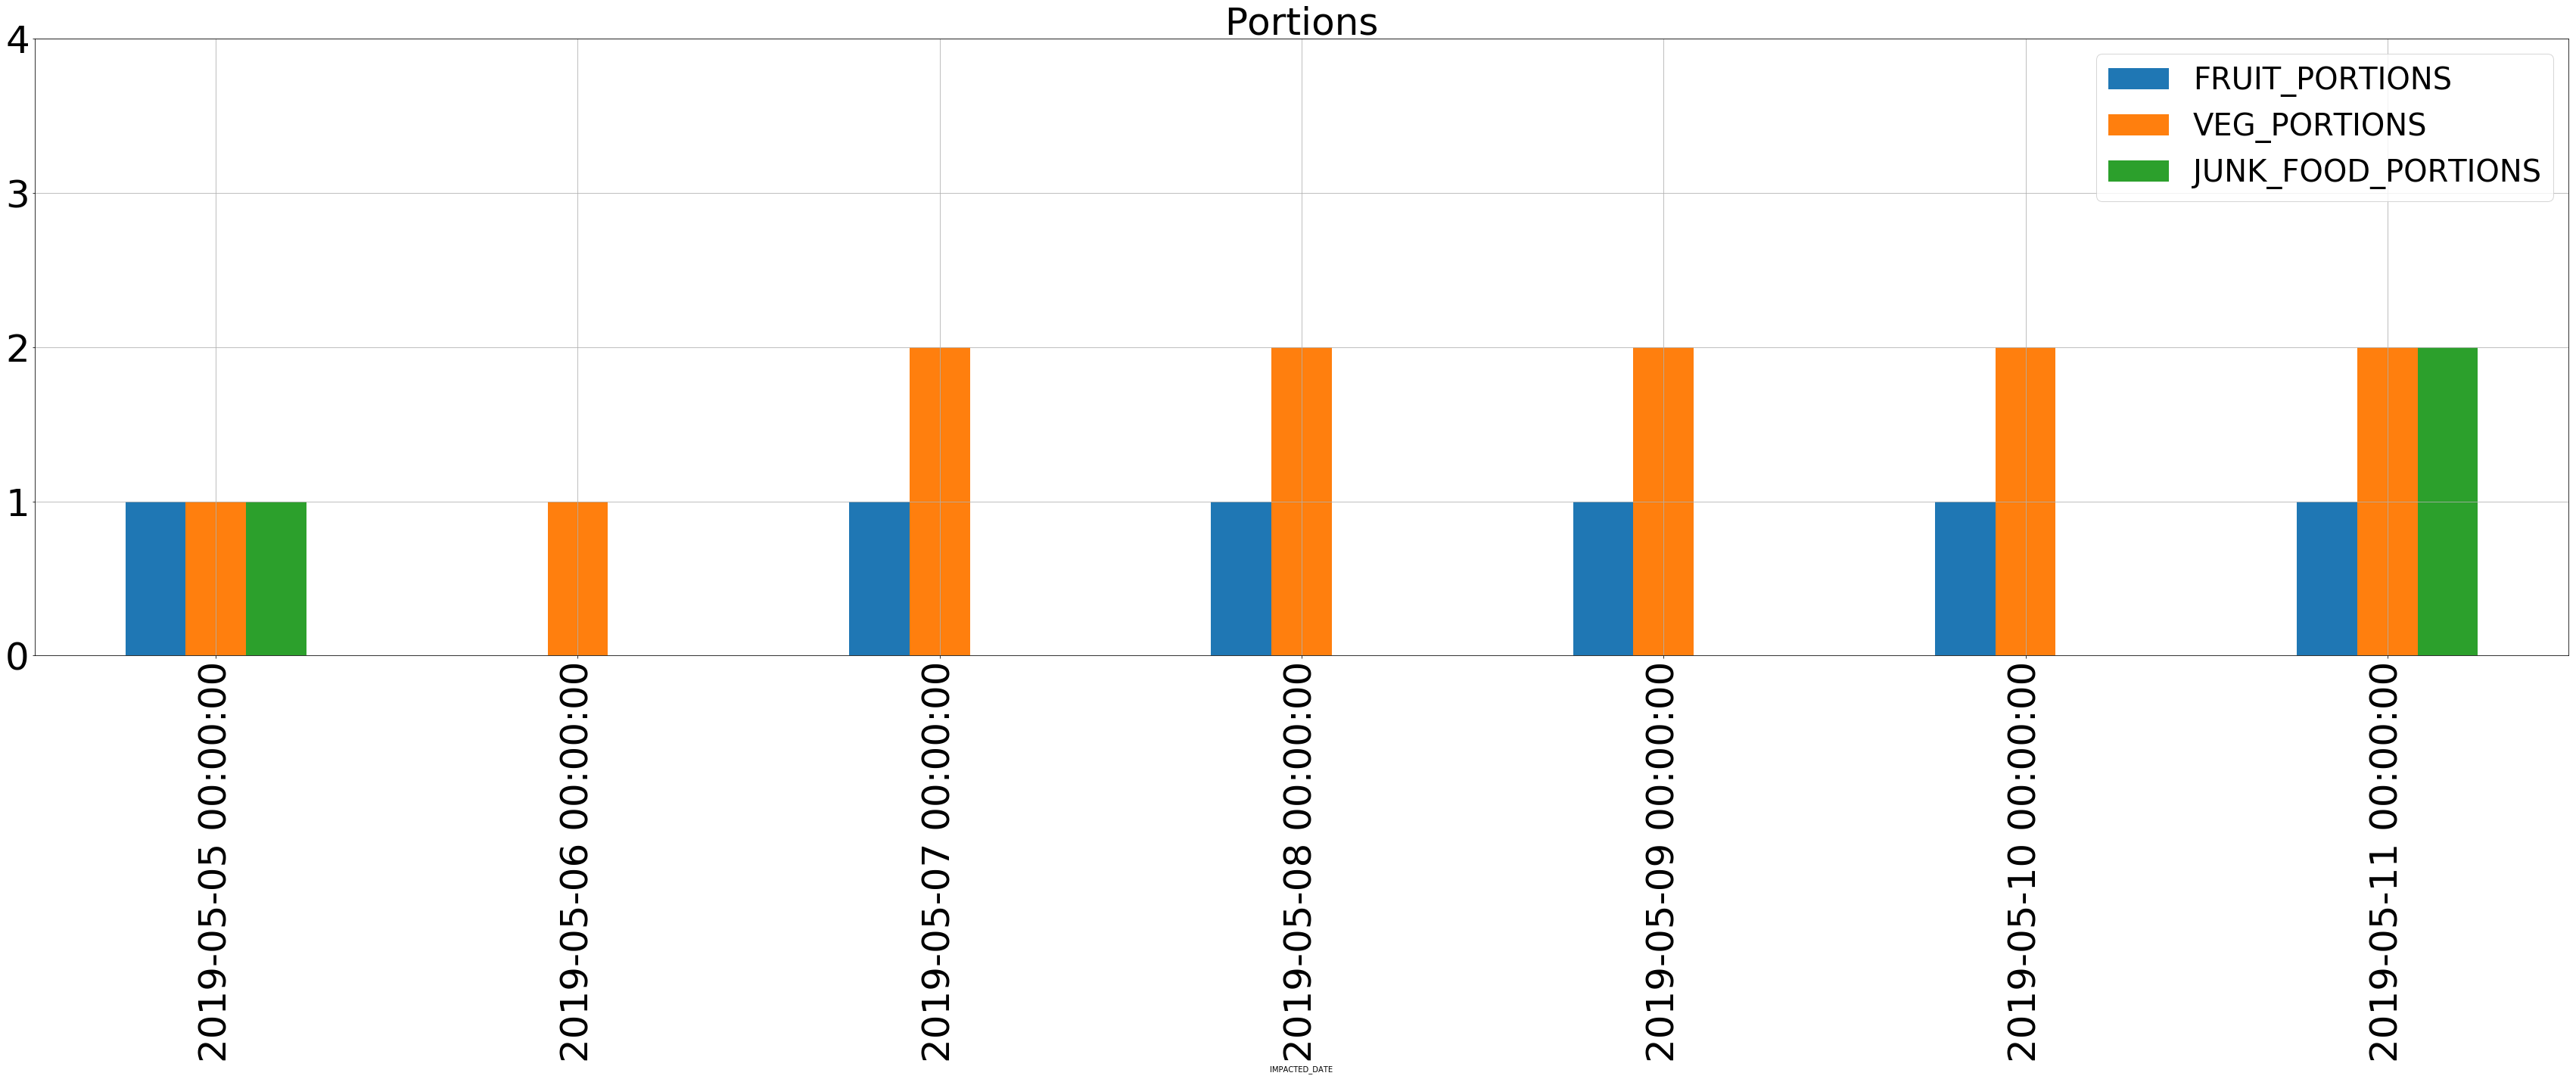

In [40]:
por_plt = prcsv[['FRUIT_PORTIONS','VEG_PORTIONS','JUNK_FOOD_PORTIONS']][-7:].plot(kind='bar',
                figsize=(60, 15),fontsize=50,use_index=True,
                grid=True,yticks=[0,1,2,3,4])
por_plt.set_title("Portions",fontsize=50)
#por_plt.set_xticks(['0','2'])
por_plt.legend(fontsize=40)

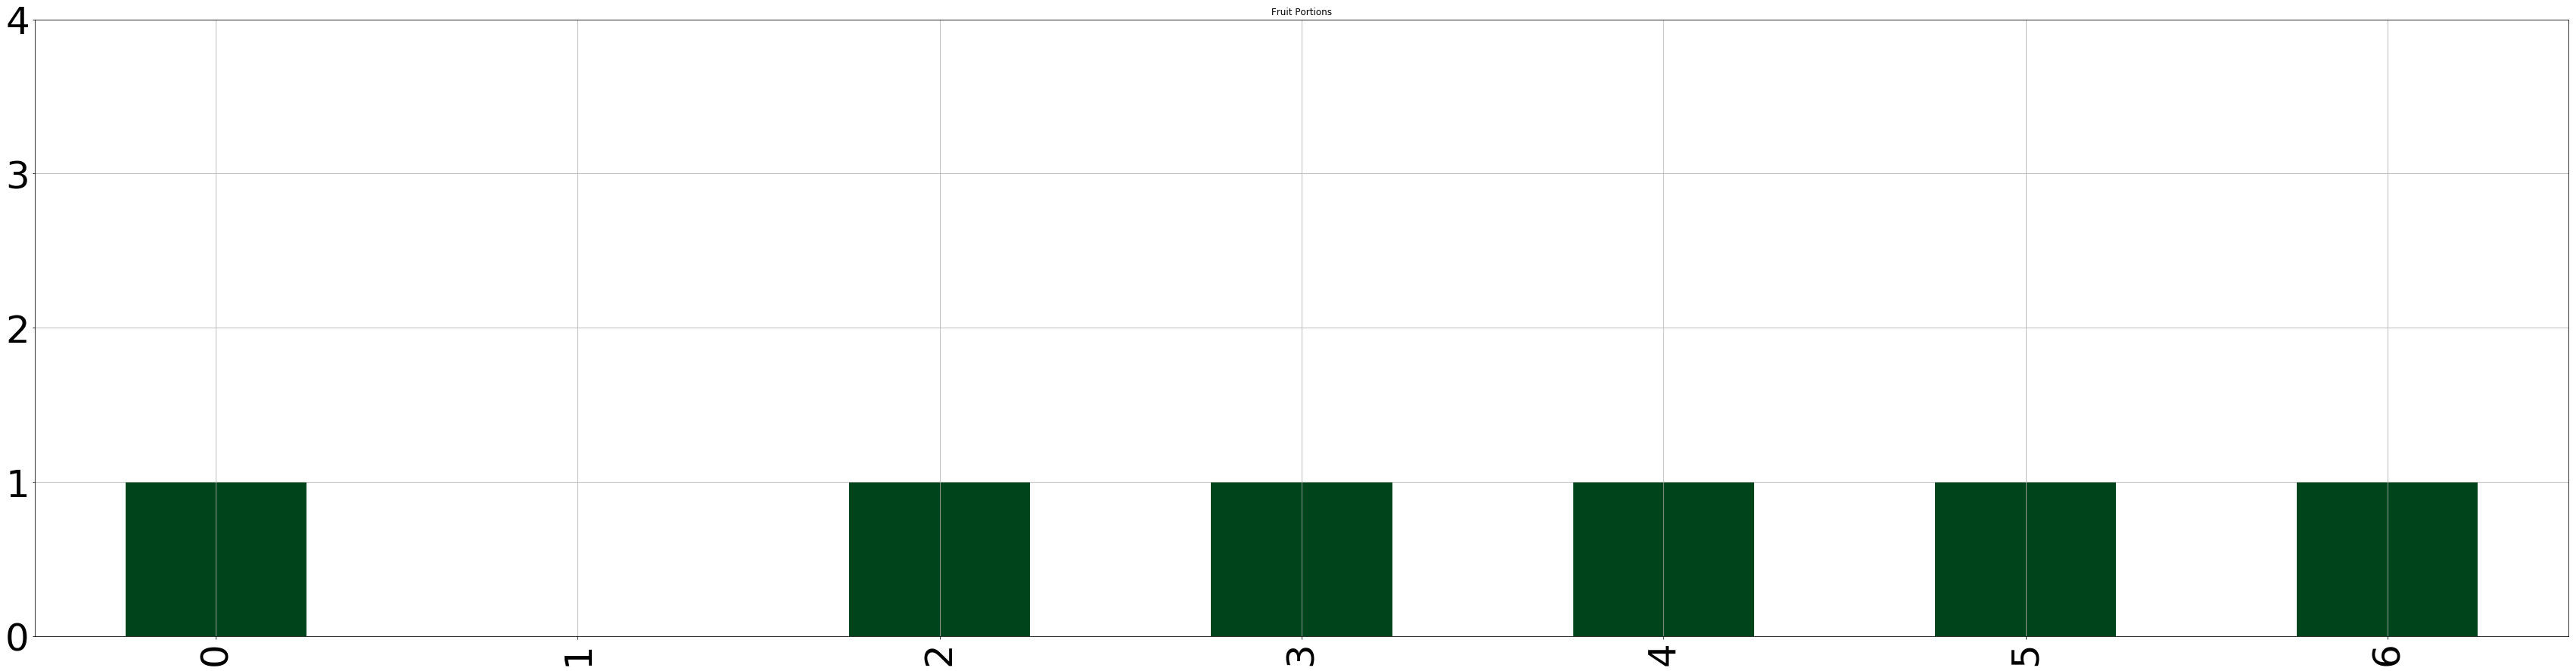

In [41]:
prcsv['FRUIT_PORTIONS'][-7:].plot(kind='bar',
                figsize=(60, 15),fontsize=50,use_index=False,
                title="Fruit Portions",grid=True,yticks=[0,1,2,3,4],colormap='Greens_r')

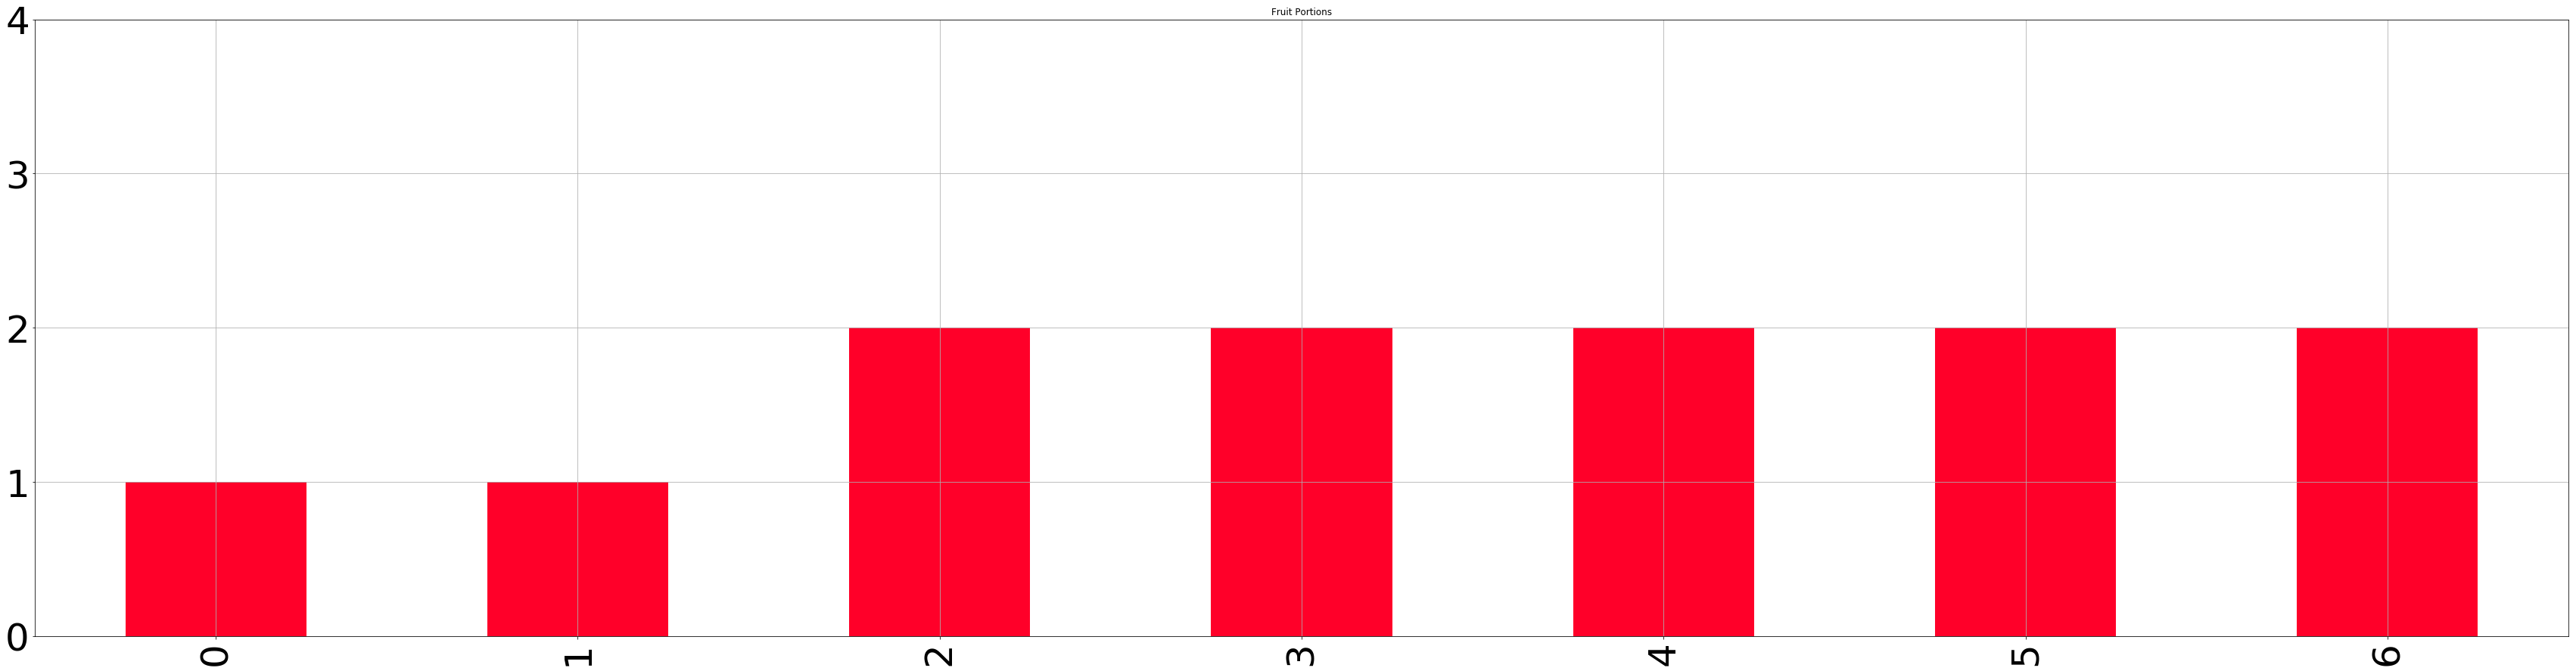

In [42]:
prcsv['VEG_PORTIONS'][-7:].plot(kind='bar',
                figsize=(60, 15),fontsize=50,use_index=False,
                title="Fruit Portions",grid=True,yticks=[0,1,2,3,4],colormap='gist_rainbow')

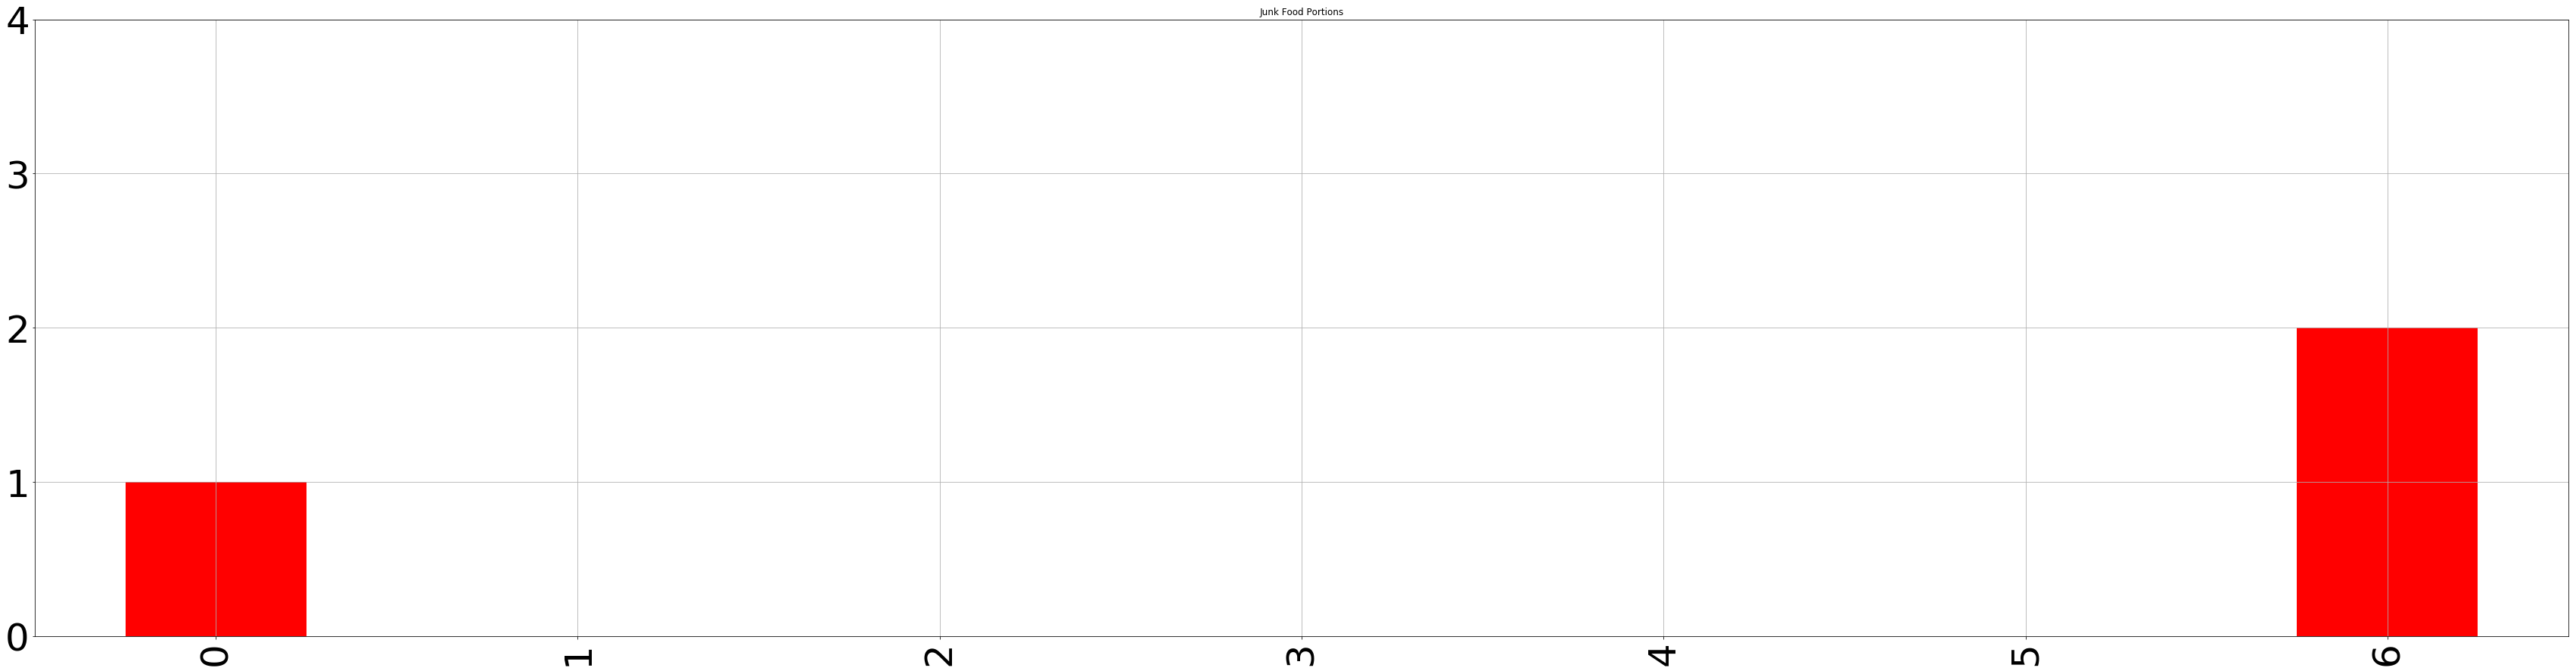

In [43]:
prcsv['JUNK_FOOD_PORTIONS'][-7:].plot(kind='bar',
                figsize=(60, 15),fontsize=50,use_index=False,
                title="Junk Food Portions",grid=True,yticks=[0,1,2,3,4],color='red')

In [44]:
prcsv['BED_TIME'][-7:]

IMPACTED_DATE
2019-05-05    2019-05-05 21:50:00
2019-05-06    2019-05-06 21:55:00
2019-05-07    2019-05-07 21:10:00
2019-05-08    2019-05-08 21:50:00
2019-05-09    2019-05-09 21:30:00
2019-05-10    2019-05-10 21:25:00
2019-05-11    2019-05-11 22:00:00
Name: BED_TIME, dtype: object

In [45]:
pr_sleeptime = prcsv[-7:].loc[prcsv['RESTED'] != 'yes'][['ACTUAL_SLEEP_TIME']]